In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import json
import pandas as pd
import traceback

sys.path.append(".") # add results folder as a python path 
from viz import *
from analyze import *

In [2]:
# Global variables and statistics
dataset = 'data2'
benchmark_name = 'LeNet5-1 on MNIST'
num_trials =10

lookup = load_lookup_data(dataset, '../lookup')
stats = get_difficulty_stats(lookup)
#print(lookup.keys())
n_samples = 20000
total_secs =  sum(lookup.duration)
total_hours = total_secs / 3600
mean_mins = total_secs / n_samples / 60
print("Execution time - total :  {:.2f}H, mean: {:.2f}M".format(total_hours, mean_mins))
for s in stats:
    print(s)
s = stats[3]
print("Selected target threshold: {}".format(s))
print("Global optimum: {:.4f}".format(np.max(lookup['best_acc'].values)))


Execution time - total :  2113.63H, mean: 6.34M
{'difficulty': 1.0, 'error': 0.008600000000000052, 'accuracy': 0.99139999999999995}
{'difficulty': 0.5, 'error': 0.0080000009999999788, 'accuracy': 0.99199999900000002}
{'difficulty': 0.1, 'error': 0.0069000009999999889, 'accuracy': 0.99309999900000001}
{'difficulty': 0.05, 'error': 0.0067000000000000393, 'accuracy': 0.99329999999999996}
{'difficulty': 0.01, 'error': 0.0062999999999999723, 'accuracy': 0.99370000000000003}
Selected target threshold: {'difficulty': 0.05, 'error': 0.0067000000000000393, 'accuracy': 0.99329999999999996}
Global optimum: 0.9939


In [3]:
# Read sequential optimization results
div10_results = {}
div20_results = {}
bo_results  = {}
opt_secs = 86400
s_path = "./{}/benchmark/".format(dataset)
div20_results['S-Div'] = load_json(s_path + 'S-Div.HPO_runner(20)' + '.json')
div10_results['S-Div (hybrid)'] = load_json(s_path + 'DIV-SEQ.hybrid.HPO_runner(10)' + '.json')
bo_results['RF-PI'] = load_json(s_path + 'RF-PI.HPO_runner(3)' + '.json')


In [22]:
max_accs = []
for i in range(3):
    max_acc = max(bo_results['RF-PI'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))

0.9938
0.9942
0.9942
avg. 0.9941 (0.0002)


In [23]:
max_accs = []
for i in range(10):
    max_acc = max(div10_results['S-Div (hybrid)'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

0.9928
0.9932
0.9939
0.9946
0.9931
0.9935
0.9939
0.9943
0.9934
0.9946
avg. 0.9937 (0.0006)


In [24]:
max_accs = []
for i in range(20):
    max_acc = max(div20_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

0.993
0.9936
0.9937
0.9928
0.9942
0.9933
0.9924
0.9935
0.9929
0.9942
0.9942
0.9922
0.9927
0.9937
0.993
0.9936
0.9922
0.9913
0.9921
0.9946
avg. 0.9932 (0.0008)


{'difficulty': 0.05, 'error': 0.0067000000000000393, 'accuracy': 0.99329999999999996}


<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

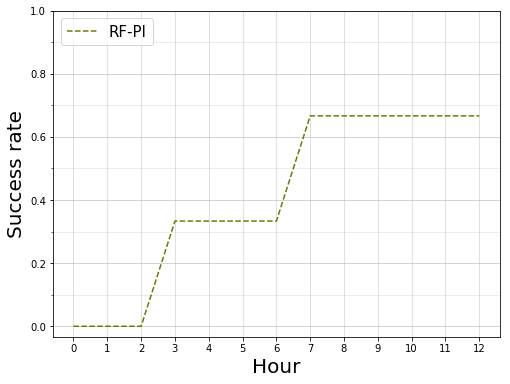

In [4]:
s = stats[3]
print(s)
draw_success_rate_fig(bo_results, s['accuracy'], 13, 
                                              x_unit='Hour', step_size=1, num_runs=3,
                                               indi=['RF-PI',] ,  
                                              #div=[ 'S-Div'], 
                                              legend={'loc': 2},
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

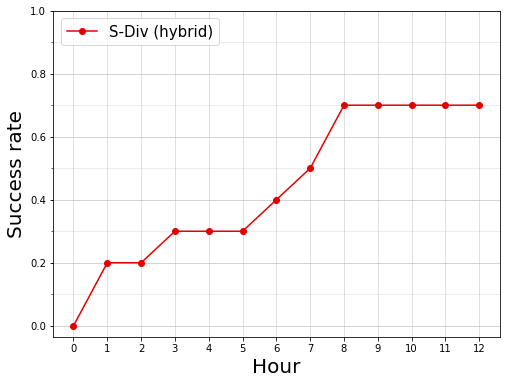

In [6]:
draw_success_rate_fig(div10_results, s['accuracy'], 13, 
                                              x_unit='Hour', step_size=1,
                                              num_runs=10,
                                              div=[ 'S-Div (hybrid)'], legend={'loc': 2},
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

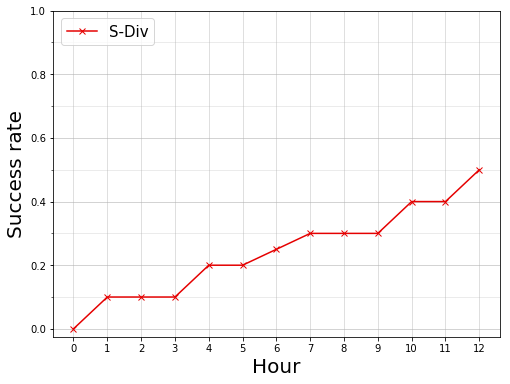

In [7]:
draw_success_rate_fig(div20_results, s['accuracy'], 13, 
                                              x_unit='Hour', step_size=1,
                                              num_runs=20,
                                              div=[ 'S-Div'], legend={'loc': 2},
                                                 width=8, height=6)

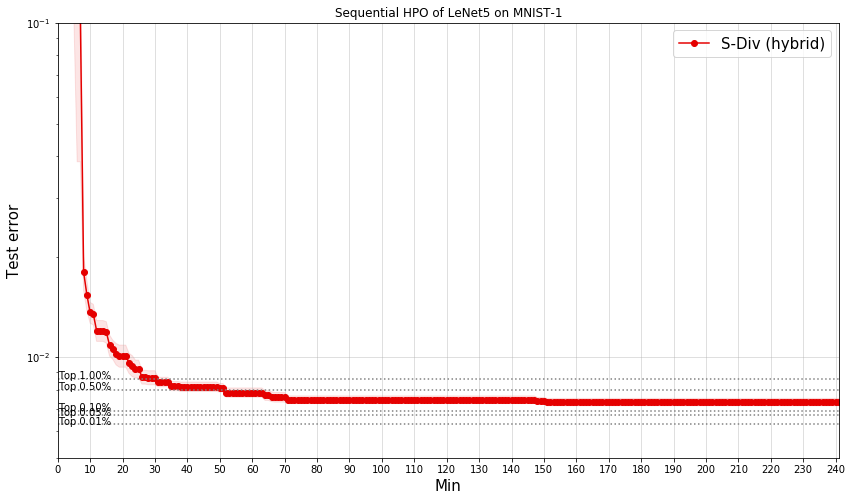

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [10]:
draw_best_error_curve(div10_results, ["S-Div (hybrid)"], 10, ylim=(.005, .1), xlim=(0, 60*4+1), 
                      summary=True, guidelines=stats, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

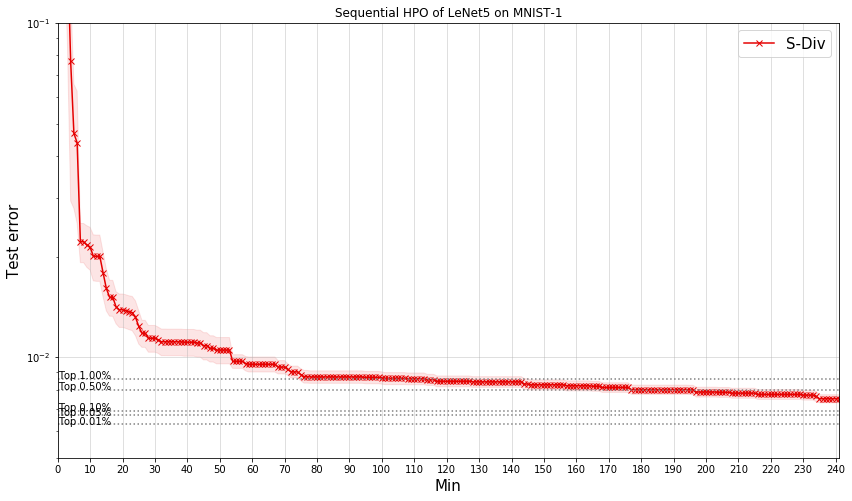

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [11]:
draw_best_error_curve(div20_results, ["S-Div"], 20, ylim=(.005, .1), xlim=(0, 60*4+1), 
                      summary=True, guidelines=stats, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

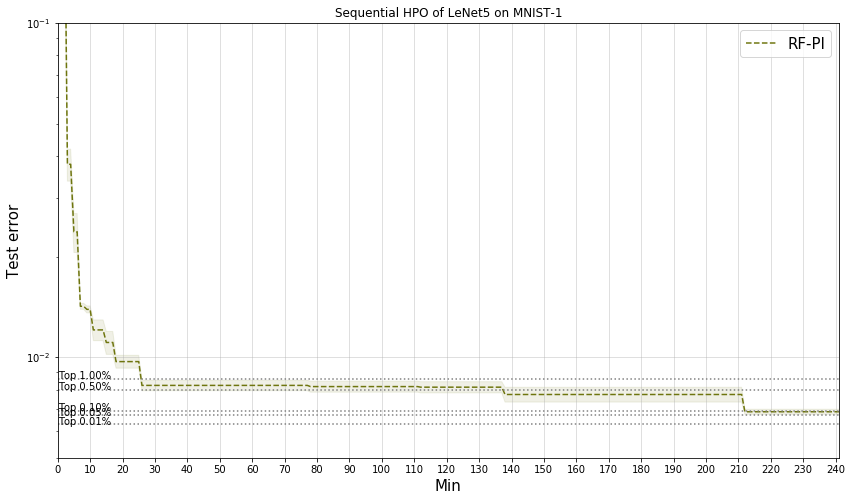

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [13]:
draw_best_error_curve(bo_results, ["RF-PI"], 3, ylim=(.005, .1), xlim=(0, 60*4+1), 
                      summary=True, guidelines=stats, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(dataset_name))

for i in range(20): 
    draw_trials_curve(div20_results, 'S-Div', i, xlim=(0, 4), width=15, height=8, loc=1, guidelines=stats, ylim=(.005, .1))